In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
model=L.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7634174432138461


In [ ]:
# !pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=0fe5057c34cd1423507448c7a215197946cbcd1d495403272f747ea384efadbb
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


##`In bigdatasets holdout approach is good means there is not much variation in accuracy`

In [ ]:
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
# Load the IDX files for the training data
X_train = idx2numpy.convert_from_file('/content/train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
# Load the IDX files for the test data
X_test = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten each sample to a 1D vector
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)  # Should print (n_samples, n_features)
print(X_test.shape)   # Should print (n_samples, n_features)

(60000, 784)
(10000, 784)


In [ ]:
dt=DecisionTreeClassifier()
model=dt.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8786


In [ ]:
np.arange(1,11,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# l=LabelEncoder()
# df['Origin']=l.fit_transform(df['Origin'])

In [ ]:
df=df.drop(columns=['Origin'])

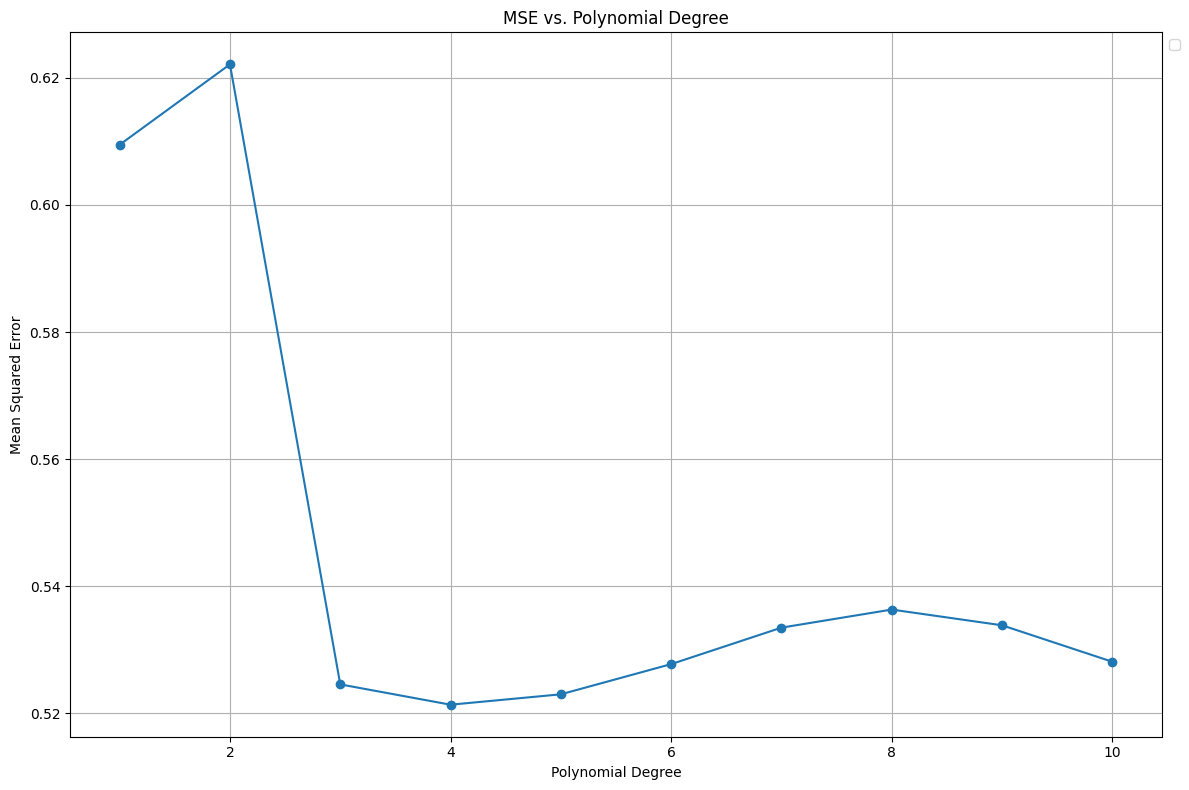

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values='?')
df = df.dropna()
df = df.drop(columns=['Origin'])

# Define feature (X) and target (y)
X = df[['Horsepower']]
y = df['MPG']

# Define ranges for degrees and random states
degrees = list(range(1, 11))

plt.figure(figsize=(12, 8))  # Initialize the plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
mse_list = []  # To store Mean Squared Errors for the current random state

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # Predict and calculate MSE
    y_pred = lr.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
plt.plot(degrees, mse_list, marker='o')
# Finalize the plot
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#`Hold out approach have high variance`

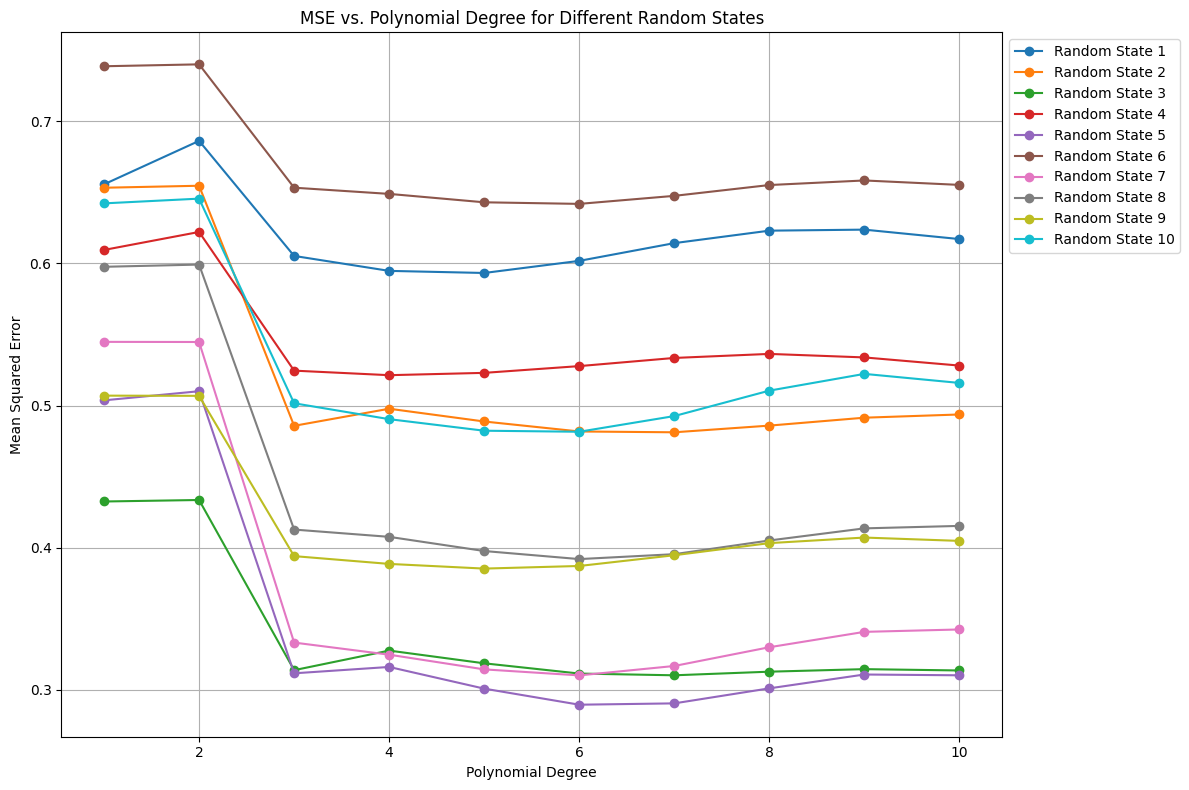

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values='?')
df = df.dropna()
df = df.drop(columns=['Origin'])

# Define feature (X) and target (y)
X = df[['Horsepower']]
y = df['MPG']

# Define ranges for degrees and random states
degrees = list(range(1, 11))
random_states = list(range(1, 11))  # Adjusted to 10 values for consistency

plt.figure(figsize=(12, 8))  # Initialize the plot

for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    mse_list = []  # To store Mean Squared Errors for the current random state

    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train the model
        lr = LinearRegression()
        lr.fit(X_train_poly, y_train)

        # Predict and calculate MSE
        y_pred = lr.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)

    # Plot MSE vs. Degree for the current random state
    plt.plot(degrees, mse_list, marker='o', label=f'Random State {random_state}')
# Finalize the plot
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree for Different Random States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


#`Leave one out cv`

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import LeaveOneOut,cross_val_score
model=LinearRegression()
L=LeaveOneOut()
cv_score_mean=cross_val_score(model,X,y,cv=L,scoring='neg_mean_squared_error')

In [ ]:
cv_score_mean=-cv_score_mean

In [ ]:
print(np.mean(cv_score_mean))

23.72574551947613


In [ ]:
cv_score_mean[:10]

array([3.72979719e+01, 1.19996083e+01, 1.74878280e+01, 2.37110133e+01,
       7.04199800e+01, 1.22185247e+01, 1.06607826e-02, 6.08323283e+01,
       2.76061960e+01, 4.35492529e-04])

#`K-fold`

In [ ]:
from sklearn.model_selection import KFold
model=LinearRegression()
kf=KFold(n_splits=6,shuffle=True,random_state=42)
cv_score=cross_val_score(model,X,y,cv=kf,scoring='r2')
print('r2 score for each fold:',cv_score)
print(np.mean(cv_score))

r2 score for each fold: [0.84177031 0.7867882  0.81483317 0.77804914 0.79650506 0.78645264]
0.8007330854774399


#`less variance campare to hold on approach`

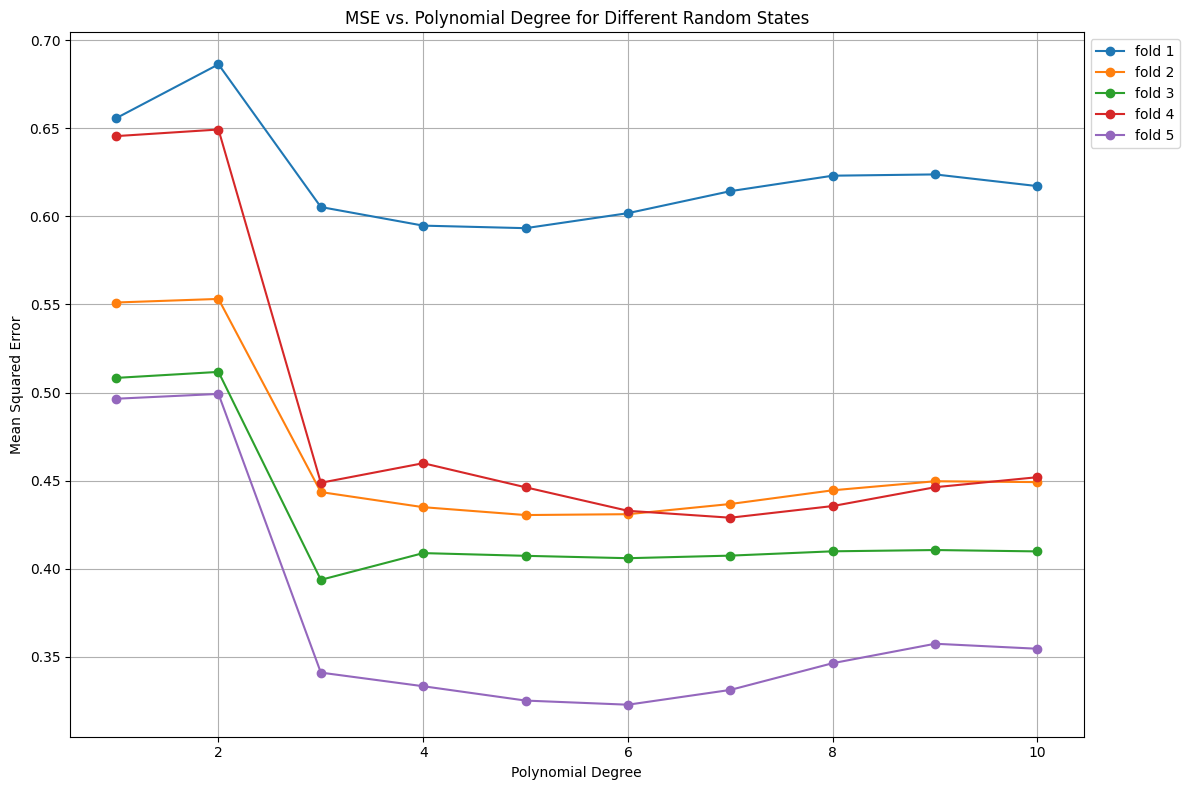

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values='?')
df = df.dropna()
df = df.drop(columns=['Origin'])

# Define feature (X) and target (y)
X = df[['Horsepower']].to_numpy()
y = df['MPG'].to_numpy()
# Define ranges for degrees and random states
degrees = list(range(1, 11))

plt.figure(figsize=(12, 8))  # Initialize the plot


kf=KFold(n_splits=5, shuffle=True, random_state=1)
for i, (train_index,test_index) in enumerate(kf.split(X)):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]
  mse_list = []  # To store Mean Squared Errors for the current random state
  for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # Predict and calculate MSE
    y_pred = lr.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    # Plot MSE vs. Degree for the current random state
  plt.plot(degrees, mse_list, marker='o', label=f'fold {i+1}')
# Finalize the plot
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree for Different Random States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#`Stratified cv`

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold,cross_val_score
data=pd.read_csv('/content/creditcard.csv')
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
lr=LogisticRegression(max_iter=1000000,random_state=42)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_score=cross_val_score(lr,X,y,cv=skf,scoring='accuracy')
print('accuracy score for each fold:',cv_score)
print('overall accuracy score',np.mean(cv_score))

accuracy score for each fold: [0.99910467 0.99910467 0.99912221 0.99931532 0.99922754]
overall accuracy score 0.9991748803239672


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold,cross_val_score
data=pd.read_csv('/content/creditcard.csv')
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
lr=LogisticRegression(max_iter=1000000,random_state=42)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
cv_score=cross_val_score(lr,X,y,cv=kf,scoring='accuracy')
print('accuracy score for each fold:',cv_score)
print('overall accuracy score',np.mean(cv_score))

accuracy score for each fold: [0.99912222 0.99928022 0.99915732 0.99915732 0.99915732]
overall accuracy score 0.99917487964592


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Outer Cross-validation (evaluate model performance)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inner Cross-validation (hyperparameter tuning)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define model and hyperparameters for tuning
model = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# GridSearchCV for hyperparameter tuning inside the inner CV loop
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)

# Nested cross-validation
nested_score = cross_val_score(grid_search, X, y, cv=outer_cv)

print(f"Nested CV score: {nested_score.mean()}")


Nested CV score: 0.9600000000000002


In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define the model
model = LogisticRegression(max_iter=200)

# RepeatedKFold Cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Perform repeated cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"Repeated CV mean score: {scores.mean()} ± {scores.std()}")


Repeated CV mean score: 0.9640000000000001 ± 0.031155523854794455


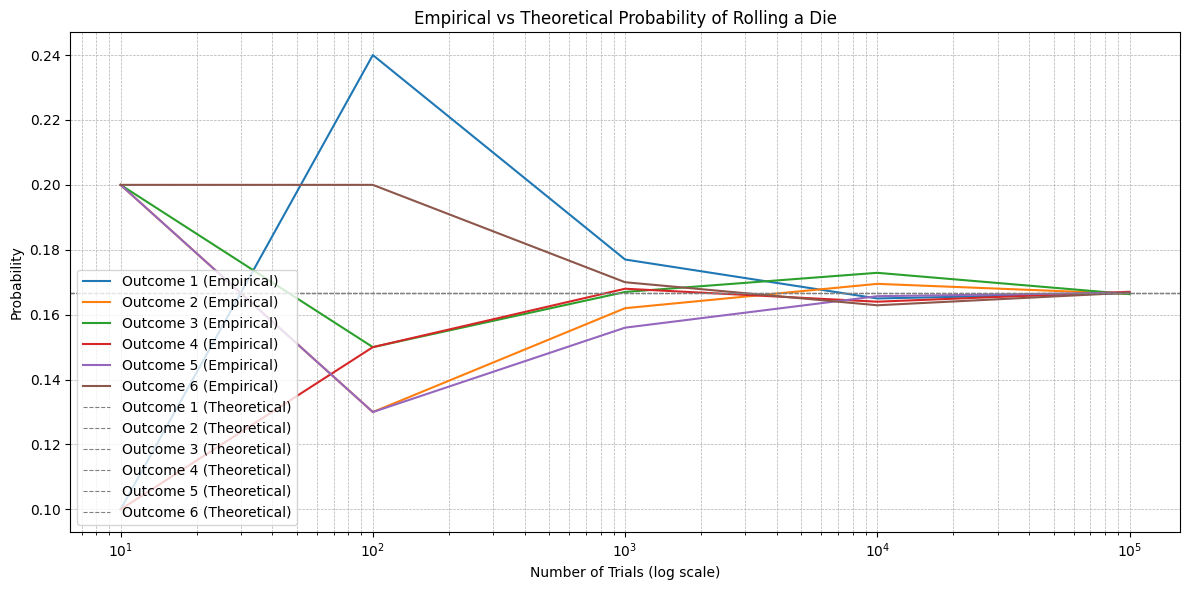

In [ ]:
import random
import matplotlib.pyplot as plt

# Function to simulate die rolls
def simulate_die_rolls(num_trials):
    outcomes = [1, 2, 3, 4, 5, 6]  # Possible outcomes on a die
    counts = {outcome: 0 for outcome in outcomes}  # Count occurrences of each outcome

    for _ in range(num_trials):
        roll = random.choice(outcomes)  # Simulate a die roll
        counts[roll] += 1

    # Calculate empirical probabilities
    empirical_probs = {outcome: count / num_trials for outcome, count in counts.items()}
    return empirical_probs

# Theoretical probability for a fair die
outcomes = [1, 2, 3, 4, 5, 6]
theoretical_prob = {outcome: 1 / 6 for outcome in outcomes}

# Simulate with increasing number of trials
num_trials_list = [10, 100, 1000, 10000, 100000]
empirical_probs_list = []

for num_trials in num_trials_list:
    empirical_probs = simulate_die_rolls(num_trials)
    empirical_probs_list.append(empirical_probs)

# Plot the results
plt.figure(figsize=(12, 6))

for outcome in outcomes:
    empirical = [empirical_probs[outcome] for empirical_probs in empirical_probs_list]
    plt.plot(num_trials_list, empirical, label=f"Outcome {outcome} (Empirical)")

# Add theoretical probability as a horizontal line
for outcome in outcomes:
    plt.axhline(y=theoretical_prob[outcome], color='gray', linestyle='--', linewidth=0.8, label=f"Outcome {outcome} (Theoretical)")

plt.xscale('log')
plt.xlabel("Number of Trials (log scale)")
plt.ylabel("Probability")
plt.title("Empirical vs Theoretical Probability of Rolling a Die")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import random
import numpy as np
X=np.random.randint(1,6,1000)
mean=np.mean(X)
print(mean)

3.019


In [ ]:
import random

# Generate 1000 random integers between 1 and 6 using random.randint
random_numbers = [random.randint(1, 6) for i in range(10000)]

# Calculate the mean
mean_value = sum(random_numbers) / len(random_numbers)

print(f"Mean of the 1000 random numbers: {mean_value}")


Mean of the 1000 random numbers: 3.4983


In [ ]:
outcome=[]
for i in range(10000000):
  random_numbers=random.randint(1, 6)
  outcome.append(random_numbers)

In [ ]:
print(np.mean(outcome))

3.4996009


In [ ]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
cross_tab=pd.crosstab(df['Survived'],df['Pclass'])
cross_tab

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
cross_tab=pd.crosstab(df['Survived'],df['Pclass'],normalize=True)
cross_tab

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


In [ ]:
cross_tab.sum().sum()

1.0

In [ ]:
joint_prob=(cross_tab / cross_tab.sum().sum())*100
joint_prob

Pclass,1,2,3
Survived,,,
0,8.978676,10.886644,41.750842
1,15.263749,9.764310,13.355780


In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame
np.random.seed(42)
df1= pd.DataFrame({
    'X': np.random.normal(5, 2, 1000),  # Random variable X
    'Y': np.random.normal(10, 3, 1000)  # Random variable Y
})

# Discretize the data into bins
x_bins = np.linspace(df1['X'].min(), df1['X'].max(), 10)  # Create bins for X
y_bins = np.linspace(df1['Y'].min(), df1['Y'].max(), 10)  # Create bins for Y

# Create a 2D histogram
hist, x_edges, y_edges = np.histogram2d(df1['X'], df1['Y'], bins=[x_bins, y_bins])

# Normalize the histogram to get joint probabilities
joint_prob = hist / hist.sum()

# Display joint probabilities as a DataFrame for clarity
joint_prob_df = pd.DataFrame(joint_prob, index=x_bins[:-1], columns=y_bins[:-1])
print(joint_prob_df)

            1.178834   3.223333   5.267832   7.312330   9.356829   11.401328  \
-1.482535       0.000      0.000      0.000      0.001      0.001      0.003   
 0.093910       0.000      0.000      0.004      0.007      0.009      0.007   
 1.670354       0.004      0.005      0.016      0.021      0.039      0.032   
 3.246798       0.006      0.011      0.022      0.056      0.086      0.056   
 4.823242       0.000      0.013      0.047      0.073      0.093      0.047   
 6.399686       0.002      0.006      0.016      0.038      0.037      0.034   
 7.976130       0.000      0.003      0.008      0.013      0.012      0.020   
 9.552575       0.000      0.000      0.002      0.002      0.003      0.002   
 11.129019      0.000      0.000      0.000      0.001      0.000      0.000   

            13.445827  15.490325  17.534824  
-1.482535       0.000      0.000      0.000  
 0.093910       0.004      0.001      0.000  
 1.670354       0.016      0.007      0.000  
 3.246798      

In [ ]:
cross_tab=pd.crosstab(df['Survived'],df['Pclass'],normalize=True,margins=True)*100
cross_tab

Pclass,1,2,3,All
Survived,,,,
0,8.978676,10.886644,41.750842,61.616162
1,15.263749,9.764310,13.355780,38.383838
All,24.242424,20.650954,55.106622,100.000000


In [ ]:
cross_tab=pd.crosstab(df['Survived'],df['Pclass'],margins=True)
cross_tab

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [ ]:
cross_tab_cp=pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')
cross_tab_cp

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [ ]:
cross_tab_cp=pd.crosstab(df['Survived'],df['Pclass'],normalize='index')
cross_tab_cp

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953
